# LGMVIP-DataScience_Task1

## Prediction using Decision Tree  Algorithm :
### In this task we will create the Decision Tree classifier and will visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly. 

### Prepared by: Nidhi Bhatia

##### Importing all the basic libararies

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

##### Loading the dataset

In [2]:
data = pd.read_csv('/Users/nidhibhatia/Desktop/Iris.csv')

##### Reading the first & the last few entries

In [3]:
data.head(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [4]:
data.tail(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


##### Looking for the missing entries & datatypes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Meaning there are no null values in the dataset

##### Size of the dataframe

In [6]:
data.shape

(150, 6)

Meaning there are 150  rows and 6 columns

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##### Looking for unique values

In [8]:
data.value_counts()

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
1    5.1            3.5           1.4            0.2           Iris-setosa        1
95   5.6            2.7           4.2            1.3           Iris-versicolor    1
97   5.7            2.9           4.2            1.3           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
                                                                                 ..
51   7.0            3.2           4.7            1.4           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
150  5.9            3.0           5.1            1.8           Iris-virginica    

Returns object containing counts of unique values

##### counting tha values of each class labels

In [9]:
data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

As,each Species has equal number of data points. Hence, our dataset is balanced

##### Looking for the correlation

In [10]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Returns the pairwise correlation of all columns in the dataframe

##### Finidng the classes to predict

In [15]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

So here we have 3 classes to predict our outcome.

##### Importing required packages

In [92]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics  

##### Seprating the Attributes and Target from data

In [93]:
X=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y=data['Species']

##### Splitting the dataset into training and testing model

In [94]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=50,test_size=0.25)

##### Training the datset

In [95]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

##### Size of Training & Testing model

In [96]:
X_train.shape

(112, 4)

In [97]:
Y_train.shape

(112,)

In [98]:
X_test.shape

(38, 4)

In [99]:
Y_test.shape

(38,)

Obtaining the Score

In [100]:
classifier.score(X_train, Y_train)

1.0

##### Visualizing our Decision Tree

[Text(133.92000000000002, 195.696, 'X[2] <= 2.6\ngini = 0.666\nsamples = 112\nvalue = [39, 35, 38]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\ngini = 0.499\nsamples = 73\nvalue = [0, 35, 38]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 5.0\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(100.44000000000001, 65.232, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.8

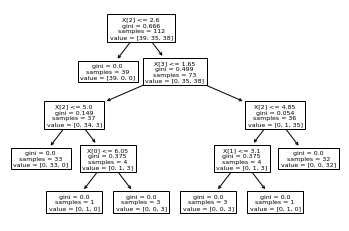

In [101]:
tree.plot_tree(classifier)

###### For better visualization

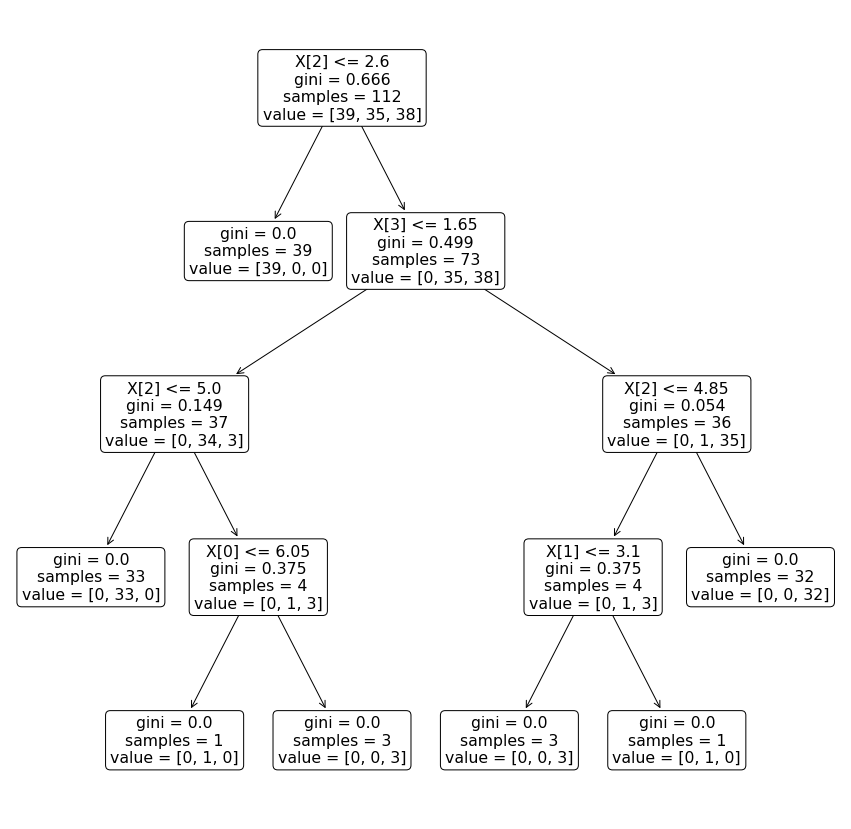

In [102]:
plt.figure(figsize=(15,15))
plot_tree(classifier, filled=False, rounded=True)
plt.show()

##### Predicting the Values/ Testing the Classifier

In [112]:
Y_predict = classifier.predict(X_test)

In [113]:
Y_predict

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

##### Obtaining the Confusion Matrix & Classification Report

In [114]:
print(classification_report(Y_test, Y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



In [115]:
confusion_matrix(Y_test, Y_predict)

array([[11,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 11]])

##### Analyzing the prediction

In [116]:
data1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})  
data1.head(10)

,Actual,Predicted
88,Iris-versicolor,Iris-versicolor
72,Iris-versicolor,Iris-versicolor
20,Iris-setosa,Iris-setosa
16,Iris-setosa,Iris-setosa
147,Iris-virginica,Iris-virginica
140,Iris-virginica,Iris-virginica
113,Iris-virginica,Iris-virginica
23,Iris-setosa,Iris-setosa
12,Iris-setosa,Iris-setosa
68,Iris-versicolor,Iris-versicolor


 In the above table we are comparing the actual versus predicted model to understand our model fitting.

**Testing with our own data**

In [117]:
test_values = [[5.1,2.7,5.1,1.6],
                        [5.6,2.1,4.5,1.1],
                        [6.5,2.7,3.0,1.5],
                        [6.0,2.2,4.6,0.5]]

Y_predicted = classifier.predict(test_values)

In [118]:
Y_predicted

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

##### Evaluating our model

Finally we will evaluate the performance of our algorithm.

In [120]:
print('Accuracy: ',accuracy_score(Y_test,Y_predict)*100,'%')

Accuracy:  94.73684210526315 %


Model gives very good accuracy score on validate or actual test data.